# Nonlinear SVR

# LinearRegression ile NonlinearSVR Görsel Karşılaştırması

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [3]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

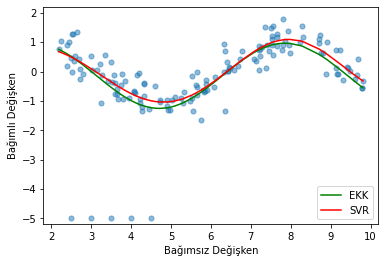

In [4]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [5]:
# Grafikte gördüğümüz kırmızı çizgi aşağıdaki aykırı gözlemlerden daha az etkilenmiş, bu çizgi SVR çizgimiz

------------------------------------------------------------------------------------------------
#### Burada NonlinearSVR ve Linear Regression karşılaştırması yapmak için suni bir veri seti oluşturup bir model kurduk.

#### Bu verisetine aşağı yönde aykırı gözlemler ekledik


#### SVR'ımızı "rbf" (SVR'ın doğrusal olmayan bir formu) aracılığıyla oluşturduk
---------------------------------------------------------------------------------------------------

# Model

In [6]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

# Tahmin

In [8]:
y_pred = svr_rbf.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test, y_pred)) # ilkel test hatamız

460.0032657244849

# Model Tuning

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
# yine C parametresini optimize etmemiz gerekiyor

In [12]:
svr_params = {"C": [0.1, 0.4, 5, 10, 20, 30, 40]}

In [13]:
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10).fit(X_train, y_train)

In [14]:
pd.Series(svr_cv_model.best_params_)[0]

40

In [15]:
# final modeli

In [16]:
svr_tuned = SVR("rbf", gamma = "auto", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [17]:
y_pred = svr_tuned.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

471.7983155460412

In [19]:
# NonlinearSVR'da hata beklenenden büyük çıkarsa,
# parametre setinden kaynaklı olabilir
# KNN' yakın bir değer olması beklenebilir

Burada gamma'nın otomatik değeri "scale" ama hocaya benzesin diye auto'ya çevirdim. normalde burada hata değerimiz scale ile 426 civarı bir şey çıkmıştı. Büyük çıkma olayı yaşanmamıştı ve dediğimiz gibi parametrelerle alakalı bir durum olduğunu görüyoruz bunun.